<a href="https://colab.research.google.com/github/AfsanehHabibi/reddit-conversation-quality/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install anytree

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
base_path = "/content/drive/MyDrive/University/RedditData/"

In [10]:
import pickle

with open(f"{base_path}conversations_with_sites.pkl", 'rb') as file:
    conversations = pickle.load(file)

print("Len loaded data:", len(conversations))

Len loaded data: 18184


site_ref_count, has_reasoning, readability_score, politnes_score

1.   List item
2.   List item



In [ ]:

for id in conversations:
    comments = conversations[id]['comments']
    for comment in comments:
        if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]'):
          print(comment)

Streaming output truncated to the last 5000 lines.
{'id': 'irl755t', 'body': 'ah yes, i see you too enjoy the works of the great douglas hofstadter', 'author': 't2_5gwjib3z', 'reply_to': 'irjlaxk', 'conversation_id': 'xyt2o1', 'politness_score': 0.14285714285714285, 'readability_score': -1.5, 'has_reasoning': False, 'site_ref_count': '0'}
{'id': 'irktnzz', 'body': 'I will ask you once again', 'author': 't2_4i8pl31g', 'reply_to': 'irktfzb', 'conversation_id': 'xyt2o1', 'politness_score': 0.09523809523809523, 'readability_score': -5.5, 'has_reasoning': False, 'site_ref_count': '0'}
{'id': 'irj56fh', 'body': 'I see your understanding of this sub is growing. Machine learning works, huzzah!', 'author': 't2_crl6mo', 'reply_to': 'irj51mi', 'conversation_id': 'xyt2o1', 'politness_score': 0.14285714285714285, 'readability_score': 0, 'has_reasoning': False, 'site_ref_count': '0'}
{'id': 'irjyuet', 'body': 'inb4 lock', 'author': 't2_d3kjd', 'reply_to': 'irjvczz', 'conversation_id': 'xyt2o1', 'pol

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




{'id': 'irirbvl', 'body': 'If you\'d allow me to indulge for a few minutes in "what could have been" it is essentially a sequence of short stories (see: Children of Time) to act as a prelude for a narrative RPG that\'s already partially coded.\n\nIt starts off with a Generation Ship run like a South American style dictatorship setting up space-based outposts and colonies, and then suddenly shooting off leaving them to fend for themselves. It switches across several hundred years of developments, as they fight for limited manufacturing and resources, going through various cultural and technical changes until their final extinction in Easter Island-style fatalistic madness.\n\nThe game starts an unknown amount of time after that, after the fall of another Generation Ship\'s civilisation in the same place, just as the slower-than-light advancing wave that is Sol System expansion hits it properly. Trapped between a graveyard and the ghosts of the Deep Past, it\'s essentially just "things 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




{'id': 'ire1p2n', 'body': 'That sounds exhausting.', 'author': 't2_i669h', 'reply_to': 'irdsepn', 'conversation_id': 'xxjd4j', 'politness_score': 0.0, 'readability_score': -3.5, 'has_reasoning': False, 'site_ref_count': '0'}
{'id': 'ire5myw', 'body': 'My colonies often only used 3 ideology slots now I know what the fourth one is for.', 'author': 't2_ez9rv', 'reply_to': 'ire1oi4', 'conversation_id': 'xxjd4j', 'politness_score': 0.14285714285714285, 'readability_score': 0, 'has_reasoning': False, 'site_ref_count': '0'}
{'id': 'irdz58l', 'body': 'Microbionics', 'author': 't2_2y85ic2u', 'reply_to': 'irdz2ml', 'conversation_id': 'xxjd4j', 'politness_score': 0.0, 'readability_score': -22.5, 'has_reasoning': False, 'site_ref_count': '0'}
{'id': 'irdwz7t', 'body': 'It\'s "idiot," and we need to use a coma to divide the 2 independent clauses of a compound sentence.', 'author': 't2_dzs6nb83', 'reply_to': 'irdsiib', 'conversation_id': 'xxjd4j', 'politness_score': 0.09523809523809523, 'readabilit

KeyboardInterrupt: 

In [11]:
# Import necessary library
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Collect data for normalization
data_to_normalize = []
readability_scores = []

for id in conversations:
    comments = conversations[id]['comments']
    for comment in comments:
        if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]'):
            # Extracting the numeric variables
            site_ref_count = comment['site_ref_count']
            has_reasoning = comment['has_reasoning']
            readability_score = comment['readability_score']
            politness_score = comment['politness_score']

            # Append data to the list for normalization
            readability_scores.append(readability_score)
            data_to_normalize.append([site_ref_count, has_reasoning, readability_score, politness_score])

# Perform normalization
normalized_data = scaler.fit_transform(data_to_normalize)

# Assign normalized values back to each comment
index = 0
for id in conversations:
    comments = conversations[id]['comments']
    for comment in comments:
        if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]'):
            comment['site_ref_count'] = normalized_data[index][0]
            comment['has_reasoning'] = normalized_data[index][1]
            comment['readability_score'] = normalized_data[index][2]
            comment['politness_score'] = normalized_data[index][3]
            index += 1


In [12]:
readability_scores

[-0.5,
 -0.5,
 -4.5,
 -5.5,
 -2.5,
 0,
 -4.5,
 -4.5,
 0,
 -4.5,
 0,
 -0.5,
 0,
 -10.5,
 -1.5,
 0,
 0,
 0,
 -4.5,
 -1.5,
 0,
 0,
 0,
 0,
 -5.5,
 0,
 -46.5,
 -0.5,
 -0.5,
 -2.5,
 -4.5,
 -1.5,
 0,
 -2.5,
 -2.5,
 0,
 0,
 -3.5,
 -2.5,
 -4.5,
 -5.5,
 0,
 0,
 -0.5,
 0,
 0,
 -1.5,
 -0.5,
 -1.5,
 -3.5,
 0,
 0,
 -4.5,
 -1.5,
 -3.5,
 -3.5,
 -0.5,
 0,
 -3.5,
 -3.5,
 -1.5,
 -5.5,
 -2.5,
 -0.5,
 -0.5,
 -1.5,
 -0.5,
 0,
 -2.5,
 -4.5,
 0,
 0,
 0,
 0,
 0,
 -5.5,
 -1.5,
 -4.5,
 -2.5,
 -1.5,
 -1.5,
 -2.5,
 -5.5,
 -3.5,
 0,
 -4.5,
 -2.5,
 -5.5,
 -5.5,
 -5.5,
 -0.5,
 0,
 -0.5,
 -5.5,
 -5.5,
 -0.5,
 -0.5,
 -1.5,
 -5.5,
 -1.5,
 -5.5,
 0,
 -5.5,
 -0.5,
 0,
 -5.5,
 -5.5,
 -34.5,
 0,
 -0.5,
 -0.5,
 0,
 -0.5,
 -0.5,
 0,
 -4.5,
 -5.5,
 -1.5,
 -3.5,
 -0.5,
 -1.5,
 -2.5,
 0,
 -2.5,
 -0.5,
 -4.5,
 -0.5,
 0,
 0,
 0,
 -3.5,
 -5.5,
 -3.5,
 -2.5,
 -2.5,
 -2.5,
 -5.5,
 0,
 -3.5,
 -1.5,
 -3.5,
 -0.5,
 -0.5,
 -5.5,
 -4.5,
 -0.5,
 -0.5,
 -0.5,
 -4.5,
 -2.5,
 -0.5,
 0,
 -1.5,
 0,
 -0.5,
 -0.5,
 -0.5,
 -1.5,
 0,
 0,
 -0.5,
 -

In [ ]:
normalized_data[:100]

array([[0.        , 0.        , 0.99932569, 0.11764706],
       [0.        , 0.        , 0.99932569, 0.11764706],
       [0.        , 0.        , 0.99393122, 0.        ],
       [0.        , 0.        , 0.9925826 , 0.05882353],
       [0.00892857, 1.        , 0.99662846, 0.47058824],
       [0.00892857, 1.        , 1.        , 0.29411765],
       [0.        , 0.        , 0.99393122, 0.11764706],
       [0.        , 0.        , 0.99393122, 0.05882353],
       [0.        , 0.        , 1.        , 0.11764706],
       [0.        , 0.        , 0.99393122, 0.11764706],
       [0.        , 0.        , 1.        , 0.05882353],
       [0.        , 1.        , 0.99932569, 0.23529412],
       [0.        , 0.        , 1.        , 0.29411765],
       [0.        , 0.        , 0.98583951, 0.05882353],
       [0.        , 0.        , 0.99797707, 0.35294118],
       [0.        , 1.        , 1.        , 0.23529412],
       [0.        , 0.        , 1.        , 0.11764706],
       [0.        , 1.        ,

In [ ]:
data_to_normalize[2][:]

['0', False, -4.5, 0.0]

In [ ]:
data_to_normalize[:100]

[[0.0, 0.0, 0.9993256911665542, 0.11764705882352941],
 [0.0, 0.0, 0.9993256911665542, 0.11764705882352941],
 [0.0, 0.0, 0.9939312204989885, 0.0],
 [0.0, 0.0, 0.9925826028320971, 0.058823529411764705],
 [0.008928571428571428, 1.0, 0.9966284558327714, 0.47058823529411764],
 [0.008928571428571428, 1.0, 1.0, 0.29411764705882354],
 [0.0, 0.0, 0.9939312204989885, 0.11764705882352941],
 [0.0, 0.0, 0.9939312204989885, 0.058823529411764705],
 [0.0, 0.0, 1.0, 0.11764705882352941],
 [0.0, 0.0, 0.9939312204989885, 0.11764705882352941],
 [0.0, 0.0, 1.0, 0.058823529411764705],
 [0.0, 1.0, 0.9993256911665542, 0.23529411764705882],
 [0.0, 0.0, 1.0, 0.29411764705882354],
 [0.0, 0.0, 0.98583951449764, 0.058823529411764705],
 [0.0, 0.0, 0.9979770734996628, 0.35294117647058826],
 [0.0, 1.0, 1.0, 0.23529411764705882],
 [0.0, 0.0, 1.0, 0.11764705882352941],
 [0.0, 1.0, 1.0, 0.35294117647058826],
 [0.0, 1.0, 0.9939312204989885, 0.23529411764705882],
 [0.0, 0.0, 0.9979770734996628, 0.11764705882352941],
 [0.0

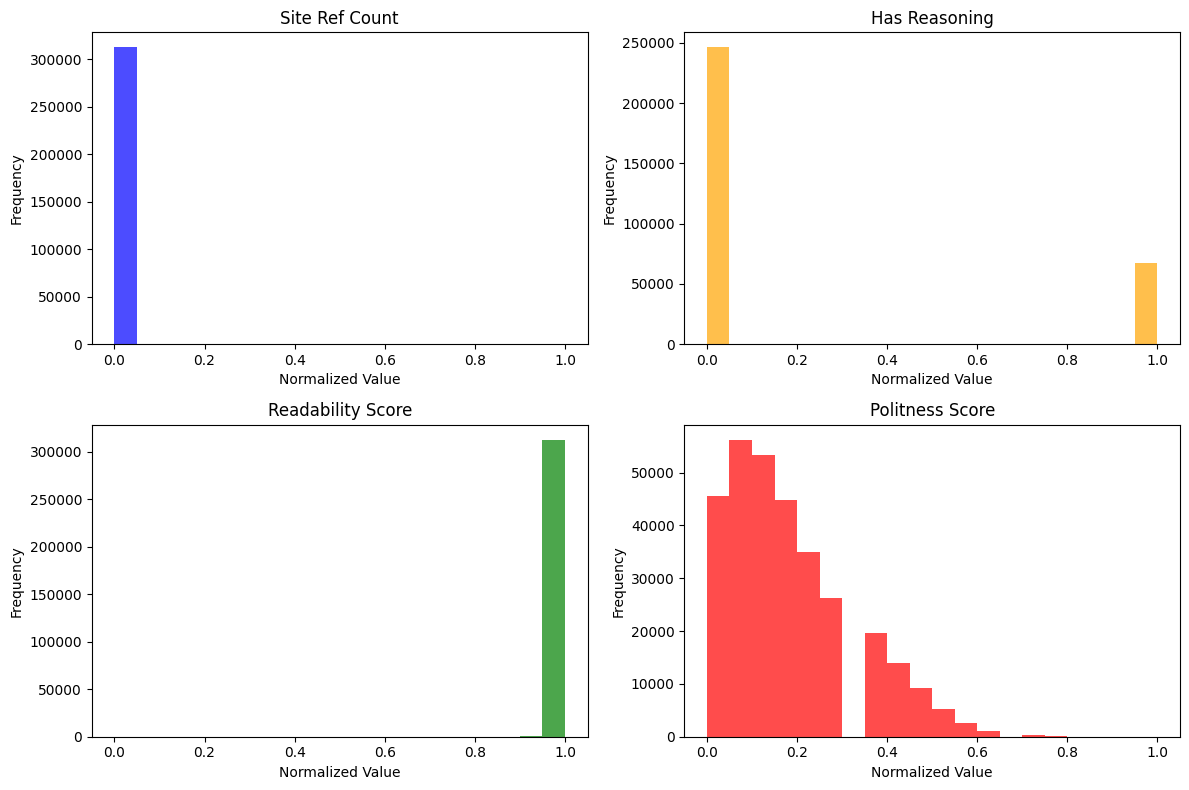

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each variable
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for each variable
axs[0, 0].hist(normalized_data[:, 0], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Site Ref Count')
axs[0, 0].set_xlabel('Normalized Value')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(normalized_data[:, 1], bins=20, color='orange', alpha=0.7)
axs[0, 1].set_title('Has Reasoning')
axs[0, 1].set_xlabel('Normalized Value')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(normalized_data[:, 2], bins=20, color='green', alpha=0.7)
axs[1, 0].set_title('Readability Score')
axs[1, 0].set_xlabel('Normalized Value')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(normalized_data[:, 3], bins=20, color='red', alpha=0.7)
axs[1, 1].set_title('Politness Score')
axs[1, 1].set_xlabel('Normalized Value')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


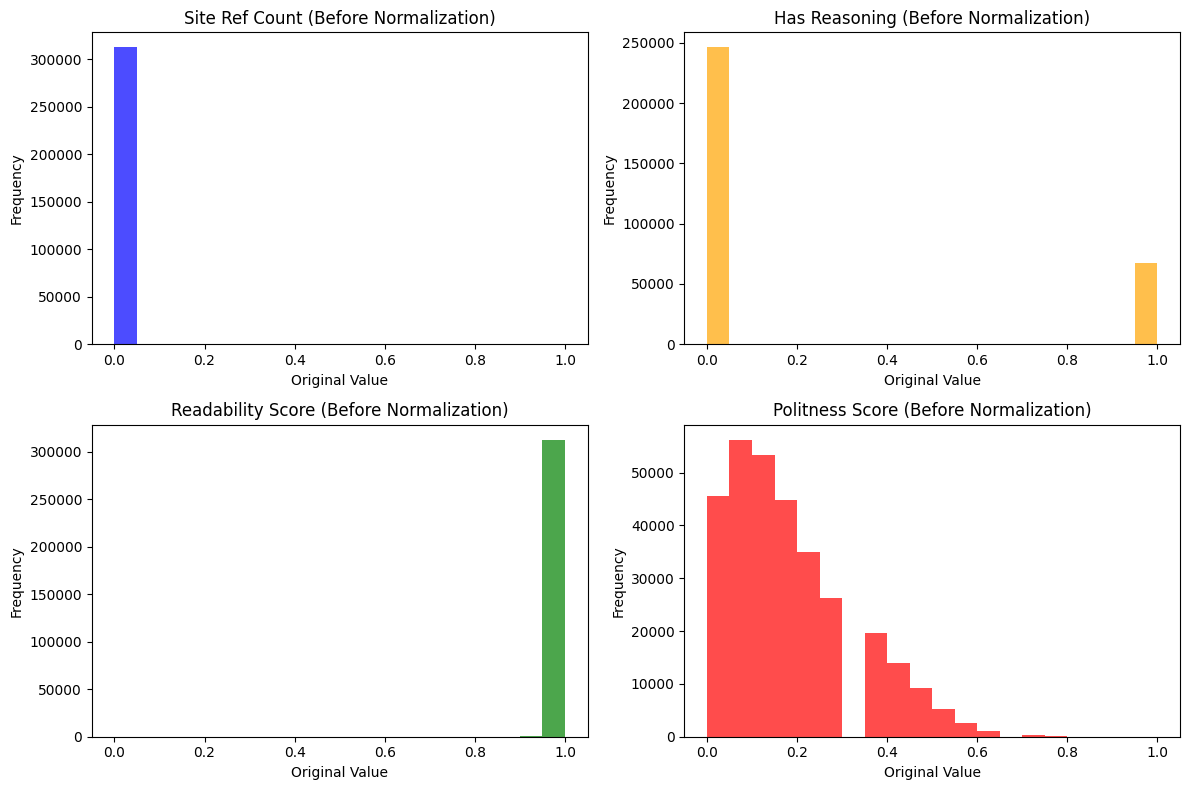

In [ ]:
import matplotlib.pyplot as plt

# Original data (before normalization)
original_site_ref_count = [comment['site_ref_count'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_has_reasoning = [comment['has_reasoning'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_readability_score = [comment['readability_score'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_politness_score = [comment['politness_score'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]

# Create a figure with subplots for each variable
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for each variable (before normalization)
axs[0, 0].hist(original_site_ref_count, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Site Ref Count (Before Normalization)')
axs[0, 0].set_xlabel('Original Value')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(original_has_reasoning, bins=20, color='orange', alpha=0.7)
axs[0, 1].set_title('Has Reasoning (Before Normalization)')
axs[0, 1].set_xlabel('Original Value')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(original_readability_score, bins=20, color='green', alpha=0.7)
axs[1, 0].set_title('Readability Score (Before Normalization)')
axs[1, 0].set_xlabel('Original Value')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(original_politness_score, bins=20, color='red', alpha=0.7)
axs[1, 1].set_title('Politness Score (Before Normalization)')
axs[1, 1].set_xlabel('Original Value')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
original_site_ref_count

[0.0,
 0.0,
 0.0,
 0.0,
 0.008928571428571428,
 0.008928571428571428,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008928571428571428,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

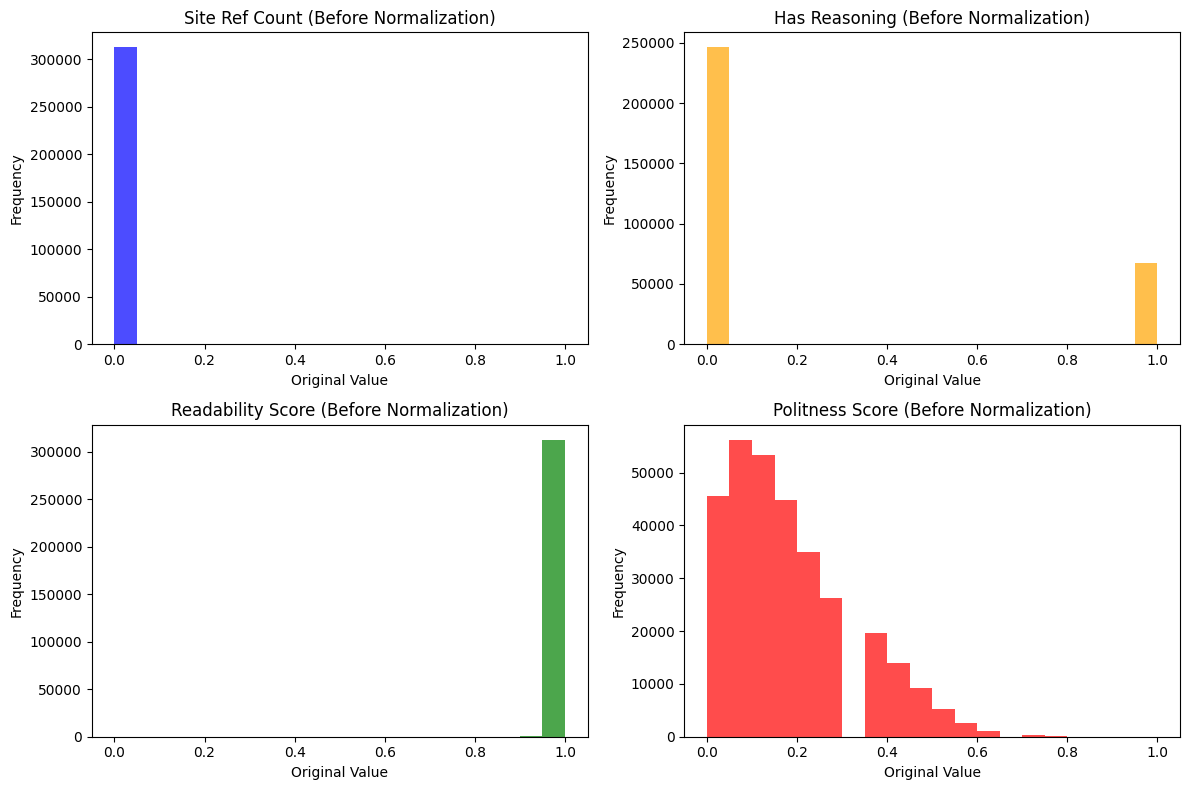

In [ ]:
import matplotlib.pyplot as plt

# Original data (before normalization)
original_site_ref_count = [comment['site_ref_count'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_has_reasoning = [comment['has_reasoning'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_readability_score = [comment['readability_score'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_politness_score = [comment['politness_score'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]

# Create a figure with subplots for each variable
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for each variable (before normalization)
axs[0, 0].hist(original_site_ref_count, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Site Ref Count (Before Normalization)')
axs[0, 0].set_xlabel('Original Value')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(original_has_reasoning, bins=20, color='orange', alpha=0.7)
axs[0, 1].set_title('Has Reasoning (Before Normalization)')
axs[0, 1].set_xlabel('Original Value')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(original_readability_score, bins=20, color='green', alpha=0.7)
axs[1, 0].set_title('Readability Score (Before Normalization)')
axs[1, 0].set_xlabel('Original Value')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(original_politness_score, bins=20, color='red', alpha=0.7)
axs[1, 1].set_title('Politness Score (Before Normalization)')
axs[1, 1].set_xlabel('Original Value')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [13]:
# Example array
my_array = [-15, 5, -12, 8, -20, -8]

# Modify values less than -10 to be -10
readability_scores = [-10 if num < -10 else num for num in readability_scores]

readability_scores

[-0.5,
 -0.5,
 -4.5,
 -5.5,
 -2.5,
 0,
 -4.5,
 -4.5,
 0,
 -4.5,
 0,
 -0.5,
 0,
 -10,
 -1.5,
 0,
 0,
 0,
 -4.5,
 -1.5,
 0,
 0,
 0,
 0,
 -5.5,
 0,
 -10,
 -0.5,
 -0.5,
 -2.5,
 -4.5,
 -1.5,
 0,
 -2.5,
 -2.5,
 0,
 0,
 -3.5,
 -2.5,
 -4.5,
 -5.5,
 0,
 0,
 -0.5,
 0,
 0,
 -1.5,
 -0.5,
 -1.5,
 -3.5,
 0,
 0,
 -4.5,
 -1.5,
 -3.5,
 -3.5,
 -0.5,
 0,
 -3.5,
 -3.5,
 -1.5,
 -5.5,
 -2.5,
 -0.5,
 -0.5,
 -1.5,
 -0.5,
 0,
 -2.5,
 -4.5,
 0,
 0,
 0,
 0,
 0,
 -5.5,
 -1.5,
 -4.5,
 -2.5,
 -1.5,
 -1.5,
 -2.5,
 -5.5,
 -3.5,
 0,
 -4.5,
 -2.5,
 -5.5,
 -5.5,
 -5.5,
 -0.5,
 0,
 -0.5,
 -5.5,
 -5.5,
 -0.5,
 -0.5,
 -1.5,
 -5.5,
 -1.5,
 -5.5,
 0,
 -5.5,
 -0.5,
 0,
 -5.5,
 -5.5,
 -10,
 0,
 -0.5,
 -0.5,
 0,
 -0.5,
 -0.5,
 0,
 -4.5,
 -5.5,
 -1.5,
 -3.5,
 -0.5,
 -1.5,
 -2.5,
 0,
 -2.5,
 -0.5,
 -4.5,
 -0.5,
 0,
 0,
 0,
 -3.5,
 -5.5,
 -3.5,
 -2.5,
 -2.5,
 -2.5,
 -5.5,
 0,
 -3.5,
 -1.5,
 -3.5,
 -0.5,
 -0.5,
 -5.5,
 -4.5,
 -0.5,
 -0.5,
 -0.5,
 -4.5,
 -2.5,
 -0.5,
 0,
 -1.5,
 0,
 -0.5,
 -0.5,
 -0.5,
 -1.5,
 0,
 0,
 -0.5,
 -0.5,
 

In [17]:
from sklearn import preprocessing
import numpy as np

x_array = np.array([2,3,5,6,7,4,8,7,6])
#normalized_arr = preprocessing.normalize([readability_scores])

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform([readability_scores])
d

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
max(readability_scores)

0

In [ ]:
import numpy as np

# Your array containing values
x_array = np.array([readability_scores])

# Count the number of values smaller than -10
count = np.sum(x_array < -200)
print("Number of values smaller than -10:", count)


Number of values smaller than -10: 83


KeyboardInterrupt: 

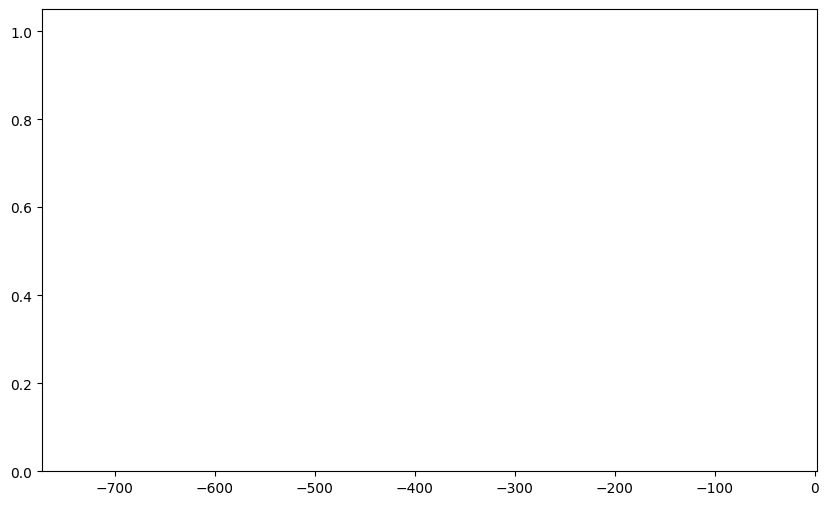

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your actual array containing outliers
x_array = np.array([readability_scores])

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(x_array, bins=20)
plt.title('Frequency of Different Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
min(readability_scores)

-741.5

In [19]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Your actual array containing negative and zero values
x_array = np.array(readability_scores)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_array.reshape(-1, 1))
scaled_data

array([[ 0.75581077],
       [ 0.75581077],
       [-0.95917404],
       ...,
       [ 0.32706457],
       [ 0.97018388],
       [-1.38792024]])

this one

In [20]:
from sklearn import preprocessing
import numpy as np

#x_array = np.array([-0.5, -0.5, -4.5, -5.5, -2.5, 0, -4.5, -4.5, 0, -4.5])
x_array = np.array(readability_scores)

scaler = preprocessing.MinMaxScaler()
# Reshape the array to have a shape of (n_samples, n_features)
x_array_reshaped = x_array.reshape(-1, 1)
d = scaler.fit_transform(x_array_reshaped)
print(d[:100])


[[0.95]
 [0.95]
 [0.55]
 [0.45]
 [0.75]
 [1.  ]
 [0.55]
 [0.55]
 [1.  ]
 [0.55]
 [1.  ]
 [0.95]
 [1.  ]
 [0.  ]
 [0.85]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.55]
 [0.85]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.45]
 [1.  ]
 [0.  ]
 [0.95]
 [0.95]
 [0.75]
 [0.55]
 [0.85]
 [1.  ]
 [0.75]
 [0.75]
 [1.  ]
 [1.  ]
 [0.65]
 [0.75]
 [0.55]
 [0.45]
 [1.  ]
 [1.  ]
 [0.95]
 [1.  ]
 [1.  ]
 [0.85]
 [0.95]
 [0.85]
 [0.65]
 [1.  ]
 [1.  ]
 [0.55]
 [0.85]
 [0.65]
 [0.65]
 [0.95]
 [1.  ]
 [0.65]
 [0.65]
 [0.85]
 [0.45]
 [0.75]
 [0.95]
 [0.95]
 [0.85]
 [0.95]
 [1.  ]
 [0.75]
 [0.55]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.45]
 [0.85]
 [0.55]
 [0.75]
 [0.85]
 [0.85]
 [0.75]
 [0.45]
 [0.65]
 [1.  ]
 [0.55]
 [0.75]
 [0.45]
 [0.45]
 [0.45]
 [0.95]
 [1.  ]
 [0.95]
 [0.45]
 [0.45]
 [0.95]
 [0.95]
 [0.85]
 [0.45]
 [0.85]]


In [ ]:
x_array_reshaped

array([[-0.5],
       [-0.5],
       [-4.5],
       ...,
       [-1.5],
       [ 0. ],
       [-5.5]])

In [ ]:
x_array

array([-0.5, -0.5, -4.5, ..., -1.5,  0. , -5.5])

In [ ]:
d

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
d[0][:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
readability_scores[:10]

[-0.5, -0.5, -4.5, -5.5, -2.5, 0, -4.5, -4.5, 0, -4.5]

In [ ]:
np.min(readability_scores)

0.0

In [ ]:
normalized_arr[0][:100]

array([0.00179127, 0.00179127, 0.0017816 , 0.00177918, 0.00178643,
       0.00179248, 0.0017816 , 0.0017816 , 0.00179248, 0.0017816 ,
       0.00179248, 0.00179127, 0.00179248, 0.00176709, 0.00178885,
       0.00179248, 0.00179248, 0.00179248, 0.0017816 , 0.00178885,
       0.00179248, 0.00179248, 0.00179248, 0.00179248, 0.00177918,
       0.00179248, 0.00168007, 0.00179127, 0.00179127, 0.00178643,
       0.0017816 , 0.00178885, 0.00179248, 0.00178643, 0.00178643,
       0.00179248, 0.00179248, 0.00178402, 0.00178643, 0.0017816 ,
       0.00177918, 0.00179248, 0.00179248, 0.00179127, 0.00179248,
       0.00179248, 0.00178885, 0.00179127, 0.00178885, 0.00178402,
       0.00179248, 0.00179248, 0.0017816 , 0.00178885, 0.00178402,
       0.00178402, 0.00179127, 0.00179248, 0.00178402, 0.00178402,
       0.00178885, 0.00177918, 0.00178643, 0.00179127, 0.00179127,
       0.00178885, 0.00179127, 0.00179248, 0.00178643, 0.0017816 ,
       0.00179248, 0.00179248, 0.00179248, 0.00179248, 0.00179